In [1]:
from datetime import datetime

from astropy.table import Table
from astropy.io import fits
from astropy.visualization import simple_norm
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np
import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
time_ini = datetime.now()

In [3]:
#images directory with photometric catalogues mosaics of all filters:
main_dir=f'observations/'

#directory for saving results:
res_dir=f'results/visual_classification_training/'

In [4]:
#loading JADES data:
data_jades=main_dir+f'hlsp_jades_jwst_nircam_goods-s-deep_photometry_v2.0_catalog.fits'

#opening extensions 9 (redshifts), 2 (coordinates), 3 (half-light radius or effective radius)
#and 5 (flux in nJy):
with fits.open(data_jades) as hdul:
    header_z=hdul[9].header
    data_z=hdul[9].data
    header_coord=hdul[2].header
    data_coord=hdul[2].data
    header_mag=hdul[5].header
    data_mag=hdul[5].data

In [5]:
num=[]
ra=[]
dec=[]

#we also do a cut in magnitude:
mag_cut=25
flux_cut=(10**((8.9-mag_cut)/2.5))*10**9

#selecting galaxies with a redshift 2<z<3 and mag<25 in both bands:
for i in range(len(data_z)):
    if (data_z['EAZY_z_a'][i]>2.8) & (data_z['EAZY_z_a'][i]<3) & (data_mag['F200W_CIRC0'][i]>flux_cut) & (data_mag['F444W_CIRC0'][i]>flux_cut):
        num.append(data_z['ID'][i])
        ra.append(data_coord['RA'][i])
        dec.append(data_coord['DEC'][i])

#creating a new table with the relevant information:        
table=Table()
table['ID']=num
table['RA']=ra
table['DEC']=dec

#selecting 50 random galaxies from this table:
total_rows=len(table)
random_indices=random.sample(range(total_rows), 50)
new_table=table[random_indices]

#create document for cutouts:
new_table.write(res_dir+f"random_sample.ecsv",overwrite=True, format="ascii.fast_no_header")

In [6]:
cuts=[]
for i in range(len(new_table['ID'])):
    file_id=new_table['ID'][i]
    cuts.append(f'{file_id}_cutout.fits')

In [7]:
#F200W filter:
%run make_postage_stamps.py --infile observations/JWST_filters/hlsp_jades_jwst_nircam_goods-s-deep_f200w_v2.0_drz.fits --coordfile results/visual_classification_training/random_sample.ecsv --xycut 2 --overwrite True 

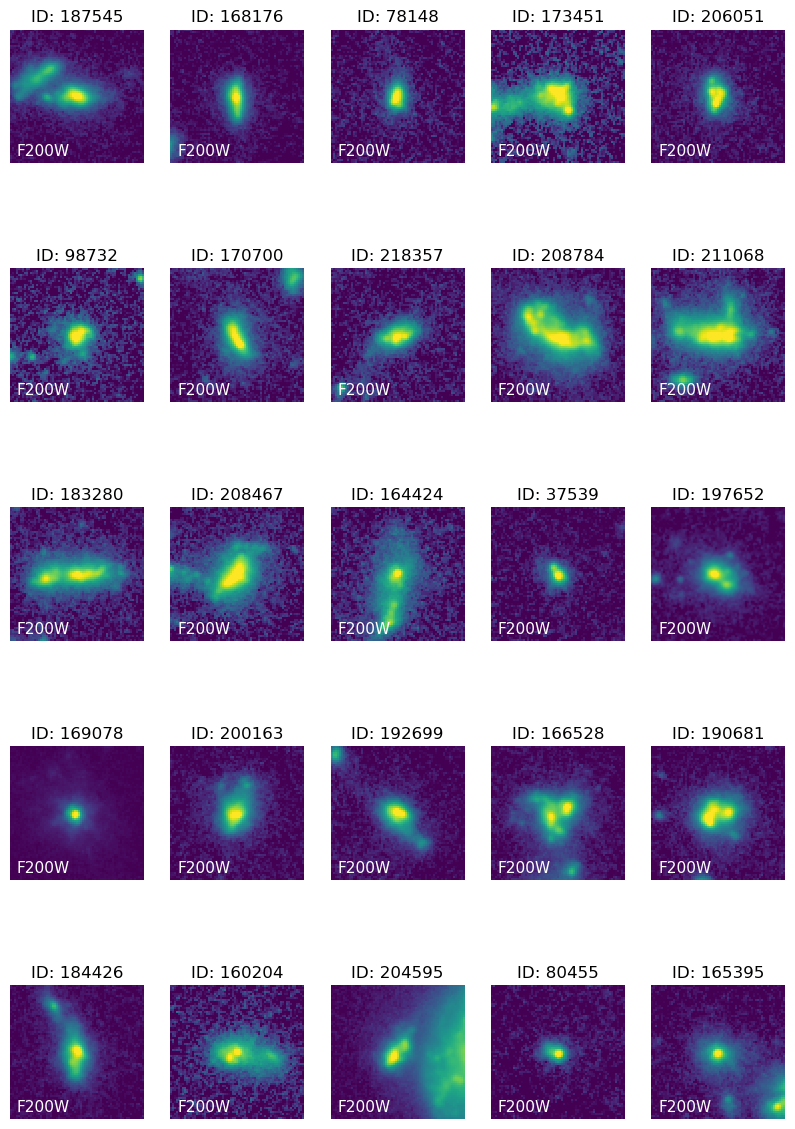

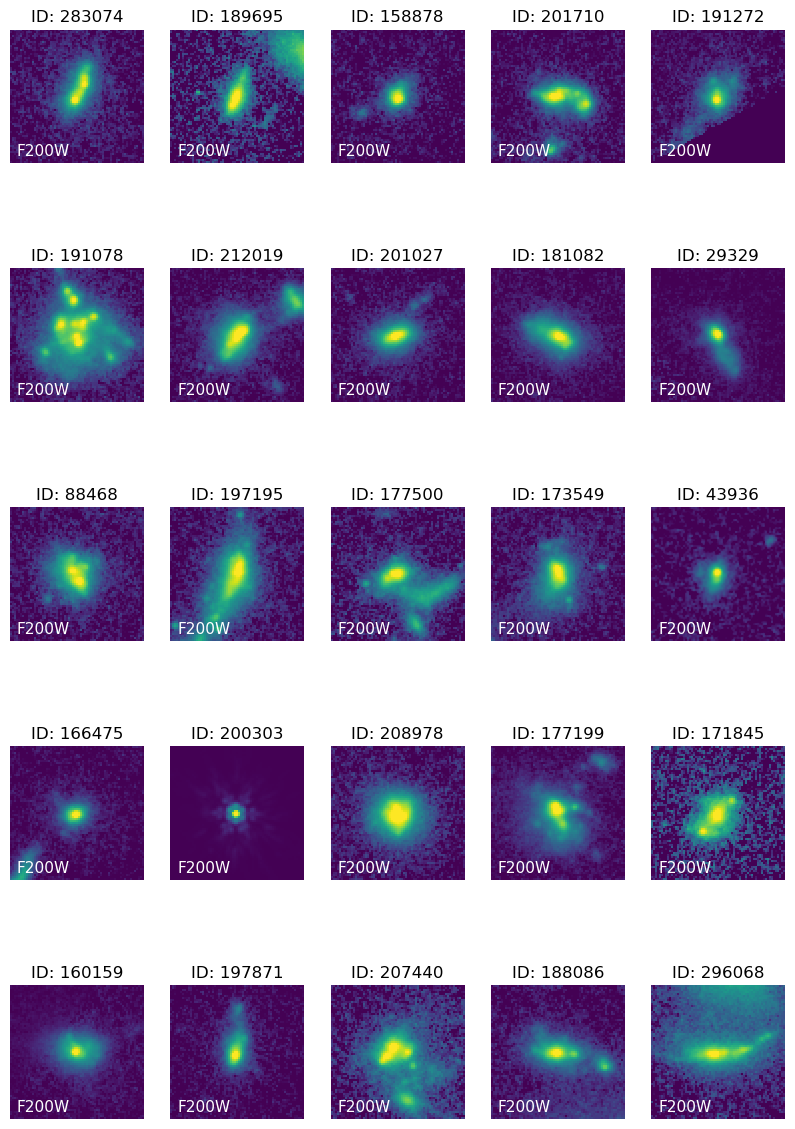

In [8]:
it=0

with PdfPages(res_dir+f'gal_cutouts_F200W.pdf') as pdf:
    
    fig=plt.figure(figsize=(10,15))
    n=0
    
    for file in cuts[0:25]:
        n=n+1
        ax = fig.add_subplot(5,5,n)
        
        #data from file:
        image=f"{file}"
        hdu_image=fits.open(image)
    
        #data to put in text:
        gid=new_table['ID'][it]

        #normalization of data:
        img_max=0.6*np.max(hdu_image[1].data)
        norm = simple_norm(hdu_image[1].data, 'log', log_a=70, min_cut=0, max_cut=img_max)
    
        #plotting figures:
        ax.axis('off')
        ax.set_title(f'ID: {gid}')
        ax.imshow(hdu_image[1].data, origin='lower', cmap='viridis', norm=norm)

        #text:
        text_kwargs = dict(ha='left', va='top', fontsize=11, color='white')
        ax.text(0.05, 0.15, f'F200W', transform=ax.transAxes, **text_kwargs)

        it=it+1

    pdf.savefig(bbox_inches="tight")

    n=0
    fig=plt.figure(figsize=(10,15))
    
    for file in cuts[25:50]:
        n=n+1
        ax = fig.add_subplot(5,5,n)
        
        #data from file:
        image=f"{file}"
        hdu_image=fits.open(image)
    
        #data to put in text:
        gid=new_table['ID'][it]

        #normalization of data:
        img_max=0.6*np.max(hdu_image[1].data)
        norm = simple_norm(hdu_image[1].data, 'log', log_a=70, min_cut=0, max_cut=img_max)
    
        #plotting figures:
        ax.axis('off')
        ax.set_title(f'ID: {gid}')
        ax.imshow(hdu_image[1].data, origin='lower', cmap='viridis', norm=norm)

        #text:
        text_kwargs = dict(ha='left', va='top', fontsize=11, color='white')
        ax.text(0.05, 0.15, f'F200W', transform=ax.transAxes, **text_kwargs)

        it=it+1

    pdf.savefig(bbox_inches="tight")

In [9]:
#F444W filter:
%run make_postage_stamps.py --infile observations/JWST_filters/hlsp_jades_jwst_nircam_goods-s-deep_f444w_v2.0_drz.fits --coordfile results/visual_classification_training/random_sample.ecsv --xycut 2 --overwrite True 

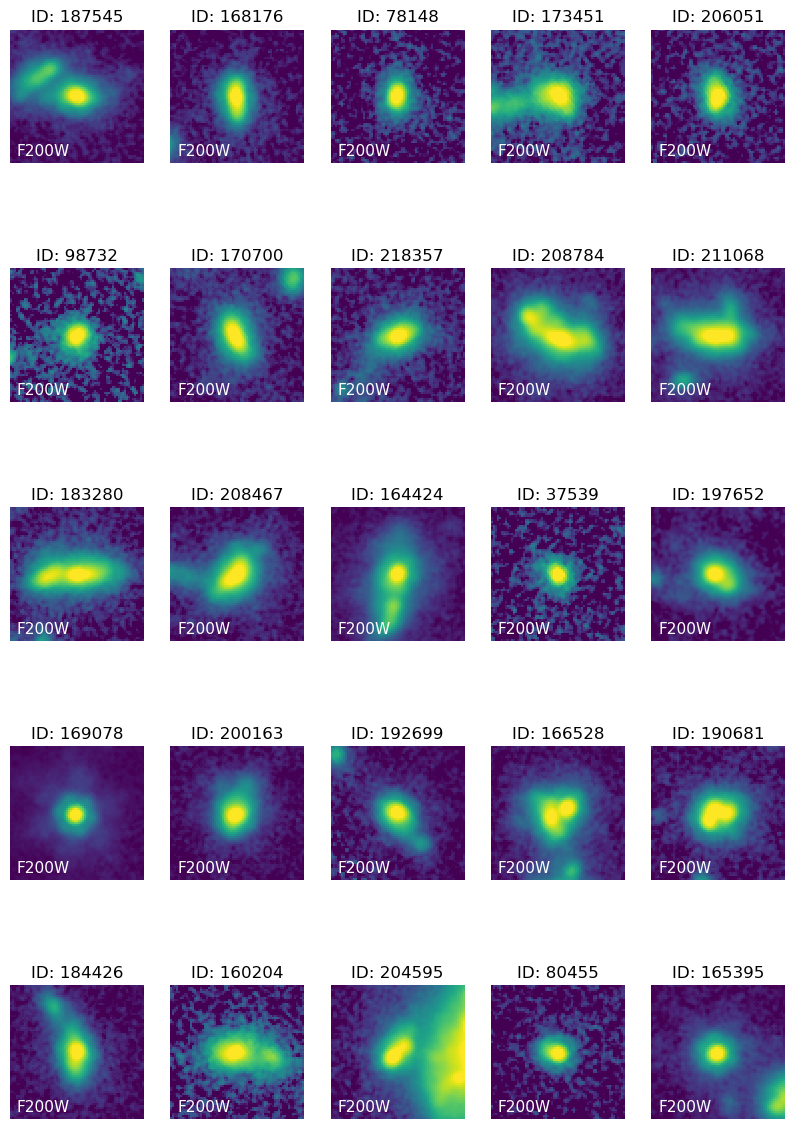

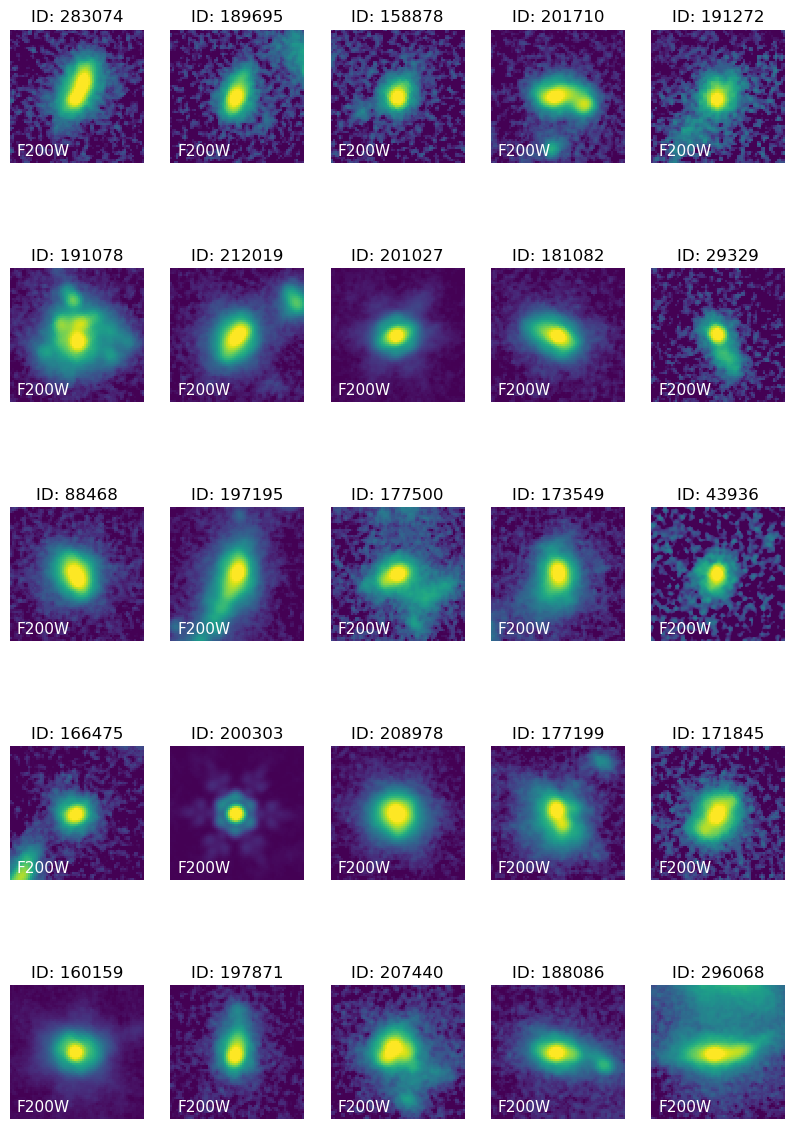

In [10]:
it=0

with PdfPages(res_dir+f'gal_cutouts_F444W.pdf') as pdf:
    
    fig=plt.figure(figsize=(10,15))
    n=0
    
    for file in cuts[0:25]:
        n=n+1
        ax = fig.add_subplot(5,5,n)
        
        #data from file:
        image=f"{file}"
        hdu_image=fits.open(image)
    
        #data to put in text:
        gid=new_table['ID'][it]

        #normalization of data:
        img_max=0.6*np.max(hdu_image[1].data)
        norm = simple_norm(hdu_image[1].data, 'log', log_a=70, min_cut=0, max_cut=img_max)
    
        #plotting figures:
        ax.axis('off')
        ax.set_title(f'ID: {gid}')
        ax.imshow(hdu_image[1].data, origin='lower', cmap='viridis', norm=norm)

        #text:
        text_kwargs = dict(ha='left', va='top', fontsize=11, color='white')
        ax.text(0.05, 0.15, f'F200W', transform=ax.transAxes, **text_kwargs)

        it=it+1

    pdf.savefig(bbox_inches="tight")

    n=0
    fig=plt.figure(figsize=(10,15))    
    for file in cuts[25:50]:
        n=n+1
        ax = fig.add_subplot(5,5,n)
        
        #data from file:
        image=f"{file}"
        hdu_image=fits.open(image)
    
        #data to put in text:
        gid=new_table['ID'][it]

        #normalization of data:
        img_max=0.6*np.max(hdu_image[1].data)
        norm = simple_norm(hdu_image[1].data, 'log', log_a=70, min_cut=0, max_cut=img_max)
    
        #plotting figures:
        ax.axis('off')
        ax.set_title(f'ID: {gid}')
        ax.imshow(hdu_image[1].data, origin='lower', cmap='viridis', norm=norm)

        #text:
        text_kwargs = dict(ha='left', va='top', fontsize=11, color='white')
        ax.text(0.05, 0.15, f'F200W', transform=ax.transAxes, **text_kwargs)

        it=it+1

    pdf.savefig(bbox_inches="tight")

In [11]:
time_end = datetime.now()
print(f"Initial time...: {time_ini}")
print(f"Final time.....: {time_end}")
print(f"Excecution time: {time_end-time_ini}")

Initial time...: 2024-03-18 09:21:51.851908
Final time.....: 2024-03-18 09:23:11.210329
Excecution time: 0:01:19.358421
